#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Número total de monedas: 6


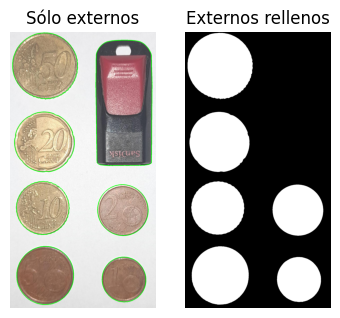

In [2]:
img = cv2.imread('monedas.jpeg') 
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

umbral = 200
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)

#Obtiene contornos externos
contornos, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)


# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 4)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

img_cont = np.zeros(img_rgb.shape)
filtered_contours = 0

for c in contornos:
    #Área delcontorno
    area = cv2.contourArea(c)
    #Filtramos por area mínima
    if area > 10 :
        perimetro = cv2.arcLength(c,True)
        #Filtramos por perimetro máximo
        if perimetro < 1700:
            #Añadimos al contador
            filtered_contours += 1
            #Dibuja los contornos
            cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

print(f'Número total de monedas: {filtered_contours}')

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?

Moneda seleccionada: 0.5 euros
Cantidad Total: 0.5 euros
Moneda seleccionada: 0.2 euros
Cantidad Total: 0.7 euros
Moneda seleccionada: 0.1 euros
Cantidad Total: 0.7999999999999999 euros
Moneda seleccionada: 0.05 euros
Cantidad Total: 0.85 euros
Moneda seleccionada: 0.02 euros
Cantidad Total: 0.87 euros
Moneda seleccionada: 0.01 euros
Cantidad Total: 0.88 euros


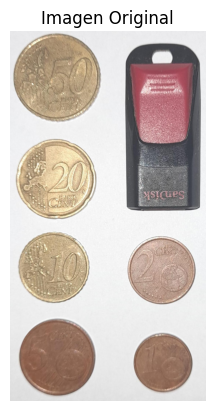

In [3]:
# Cargar la imagen
img = cv2.imread('monedas.jpeg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Conversión a escala de grises y suavizado
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pimg = cv2.medianBlur(gris, 7)

# Detección de círculos
circ = cv2.HoughCircles(
    pimg,
    cv2.HOUGH_GRADIENT,
    1,
    100,
    param1=100,
    param2=50,
    minRadius=160,
    maxRadius=260,
)

# Dibuja círculos en la imagen

valores_monedas = {"50_cent": 0.5, "20_cent": 0.2, "10_cent":0.1, "5_cent":0.05,"2_cent":0.02, "1_cent":0.01}

def calcular_cantidad_dinero(det_radio):
    # Calcula la cantidad de dinero asociada al círculo
    # Puedes ajustar esto según los valores reales de las monedas

    if det_radio < 245 and det_radio > 240:
        return valores_monedas["50_cent"]
    elif det_radio < 220 and det_radio > 215:
        return valores_monedas["20_cent"]
    elif det_radio < 200 and det_radio > 195:
        return valores_monedas["10_cent"]
    elif det_radio < 211 and det_radio > 209:
        return valores_monedas["5_cent"]
    elif det_radio < 186 and det_radio > 184:
        return valores_monedas["2_cent"]
    else:
        return valores_monedas["1_cent"]
    
cantidadTotal = 0.0
# Muestra los resultados y manejo de clics
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Imagen Original')


def clic_en_imagen(event, x, y, flags, param):
    global cantidadTotal
    if event == cv2.EVENT_LBUTTONDOWN:
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            # Verifica si el clic está dentro del círculo
            if np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2) < det_radio:
                cantidad = calcular_cantidad_dinero(det_radio)
                cantidadTotal += cantidad
                print(f"Moneda seleccionada: {cantidad} euros")
                print(f"Cantidad Total: {cantidadTotal} euros")

cv2.namedWindow('Imagen',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('Imagen', clic_en_imagen)


while True:
    cv2.imshow('Imagen', gris)
    if cv2.waitKey(20) == 27:  # Presiona Esc para salir
        break

cv2.destroyAllWindows()
